# Analysis of Garnet 6 component space
* Garnets tested are from experiments (LEPR) and natural samples (PetDB)
* 6 components do not capture garnet data space
* Reduction of 8 oxide space to 1D to assess composition of missing two components
* Residual components may indicate Ti and Cr are not well captured by 6 components
* Extra Ti may appear on T site?

In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import garnet_basis
importlib.reload(garnet_basis)

%matplotlib inline

In [447]:
import os
os.getcwd()
os.chdir('/Users/jennaadams/Desktop/Garnet model/garnet_model_calibration')


In [448]:
oxides = ['SiO2','CaO','TiO2','Al2O3','FeO','MnO','Cr2O3','MgO']
molar_data_exp = garnet_basis.read_exp_data(oxides)
molar_data_nat = garnet_basis.read_nat_data(oxides)


In [449]:
molar_data_exp['mol_frac_oxides'].head()



SiO2        CaO        TiO2     Al2O3        FeO         MnO  \
0  0.428151   0.111311  0.00569677   0.13928   0.140643  0.00357487   
1  0.425382     0.0516  0.00540212  0.132422  0.0742909           0   
2  0.427826  0.0455353  0.00307599  0.133513   0.059571           0   
3  0.424558  0.0497622  0.00535599  0.132769  0.0708881           0   
4  0.423124  0.0534761  0.00762759  0.132621   0.066852           0   

         Cr2O3       MgO  
0  0.000171126  0.171172  
1   0.00199986  0.308904  
2   0.00209027  0.328389  
3   0.00142761  0.315239  
4    0.0019056  0.314393

In [450]:
molar_data_exp['mol_cation_per_oxy'].head()

Si         Ca          Ti        Al         Fe          Mn  \
0  0.249979  0.0649897   0.0033261  0.162639  0.0821151  0.00208721   
1  0.250279  0.0303596  0.00317841  0.155824  0.0437101           0   
2   0.25135  0.0267523  0.00180717   0.15688  0.0349984           0   
3  0.249989   0.029301  0.00315372  0.156354  0.0417404           0   
4  0.248925  0.0314601  0.00448733  0.156043  0.0393292           0   

            Cr         Mg  
0  0.000199826  0.0999401  
1    0.0023533   0.181748  
2   0.00245609   0.192931  
3   0.00168121   0.185619  
4   0.00224214   0.184958

In [451]:
ref_avg_compo_garnet = molar_data_nat['mol_frac_oxides'].mean(axis=0)

rel_molar_data_nat = molar_data_nat['mol_frac_oxides']-ref_avg_compo_garnet

rel_molar_data_exp = molar_data_exp['mol_frac_oxides']-ref_avg_compo_garnet

In [452]:
ref_avg_compo_garnet

SiO2     0.421673
CaO      0.058053
TiO2     0.003140
Al2O3    0.125120
FeO      0.079636
MnO      0.004385
Cr2O3    0.013071
MgO      0.294922
dtype: float64

In [453]:
molec_weights, cation_stoic, oxy_stoic, cation_names = garnet_basis.get_oxide_info(oxides) 

In [454]:
cation_stoic

array([1, 1, 1, 2, 1, 1, 2, 1], dtype=object)

In [475]:
%matplotlib inline
Silica = molar_data['mol_cation_per_oxy']['Si']*12
plt.plot(Silica)
plt.xlabel('Experiment')
plt.ylabel('Si on basis of 12 O')

NameError: name 'molar_data' is not defined

In [ ]:
plt.plot(site_occ_table['T:Al'],'ko')
plt.xlabel('Experiment')
plt.ylabel('Tetrahedral Al')

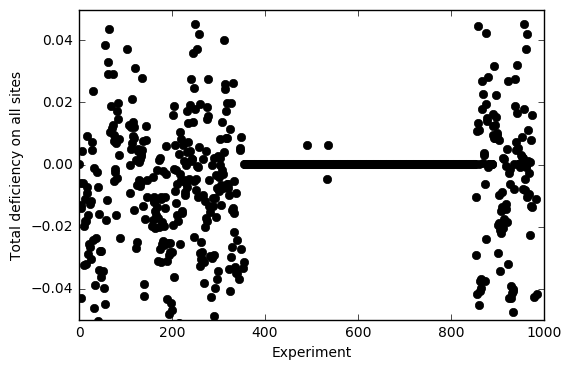

In [275]:
plt.plot(site_occ['total_deficiency'],'ko')
plt.ylim(-0.05,0.05)
plt.xlabel('Experiment')
plt.ylabel('Total deficiency on all sites')

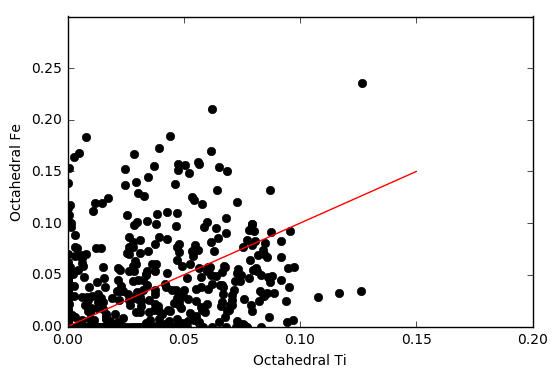

In [276]:
plt.plot(site_occ_table['Y:Ti'], site_occ_table['Y:Fe'],'ko')
x=np.linspace(0,0.15,101)
plt.plot(x,x,'r-')
plt.xlim(0,0.2)
plt.ylim(0,0.3)
plt.xlabel('Octahedral Ti')
plt.ylabel('Octahedral Fe')

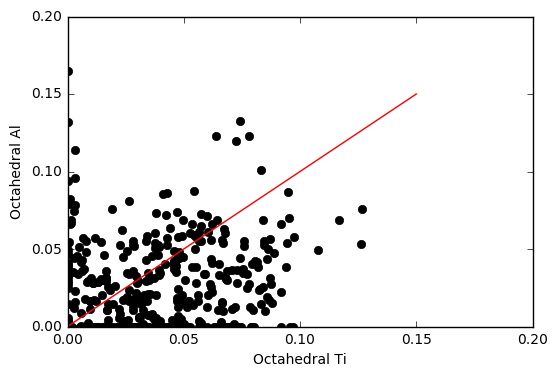

In [277]:
plt.plot(site_occ_table['Y:Ti'],site_occ_table['T:Al'],'ko')
x=np.linspace(0,0.15,101)
plt.plot(x,x,'r-')
plt.xlim(0,0.2)
plt.ylim(0,0.2)
plt.xlabel('Octahedral Ti')
plt.ylabel('Octahedral Al')

In [189]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook





<IPython.core.display.Javascript object>


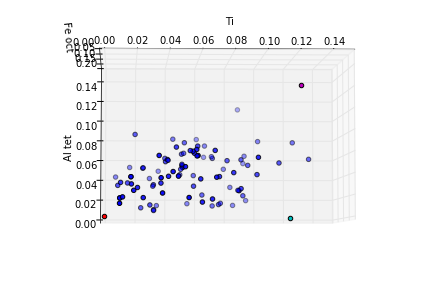

(0, 0.15)

In [195]:
has_Al_tet = site_occ['Al_tet']>0.005
has_Fe_oct = site_occ['Fe_oct']>0.005
has_Fe_oct = (site_occ['Fe_oct']>=0) & (site_occ['Fe_oct']<0.05)
has_Ti = site_occ['Ti']>0.005
mask=has_Al_tet & has_Fe_oct & has_Ti
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(site_occ['Ti'][mask],site_occ['Fe_oct'][mask],site_occ['Al_tet'][mask])
ax.scatter(0,0,0,c='r')
ax.scatter(0.12,0,0.12,c='m')
ax.scatter(0.12,0.12,0,c='c')

ax.set_xlabel('Ti')
ax.set_ylabel('Fe oct')
ax.set_zlabel('Al tet')

ax.set_xlim(0,0.15)
ax.set_ylim(0,0.2)
ax.set_zlim(0,0.15)


In [ ]:
plt.plot(cat_basis_12O['Al'],cat_basis_12O['Si'],'ko')
plt.xlabel('Al')
plt.ylabel('Si')

plt.plot(cat_basis_12O['Ti'],cat_basis_12O['Si'],'ko')
#plt.xlim(0,0.2)
plt.xlabel('Ti')
plt.ylabel('Si')

In [ ]:
mask_xtrm_Ti = cat_basis_12O['TiO2']>0.2



oxide[mask_xtrm_Ti]

In [ ]:
mask_hi_Ti = (cat_basis_12O['TiO2']>0) & (cat_basis_12O['TiO2']<0.2)
plt.hist(oxide.loc[mask_hi_Ti]['TiO2'])
plt.xlabel('TiO2 wt%')
plt.ylabel('Frequency')

In [ ]:
plt.plot(cat_basis_12O['TiO2'],cat_basis_12O['FeO'],'ro')
plt.xlim(0,.2)
plt.xlabel('TiO2')
plt.ylabel('FeO')

In [ ]:
plt.plot(cat_basis_12O['TiO2'],cat_basis_12O['MgO'],'ko')
plt.xlabel('TiO2')
plt.ylabel('MgO')

In [ ]:
plt.plot(cat_basis_12O['TiO2'],cat_basis_12O['CaO'],'ko')
plt.xlabel('TiO2')
plt.ylabel('CaO')

In [ ]:
# In order of oxide_cols
grs = np.array([3,3,0,1,0,0,0,0,0])
pyr = np.array([3,0,0,1,0,0,0,0,3])
alm = np.array([3,0,0,1,3,0,0,0,0])
sps = np.array([3,0,0,1,0,3,0,0,0])
knr = np.array([3,0,0,1,0,0,0,1,3])
mor = np.array([3,3,1,0,1,0,0,0,0])

grs_mass = np.dot(grs,molec_weights)
pyr_mass = np.dot(pyr,molec_weights)
alm_mass = np.dot(alm,molec_weights)
sps_mass = np.dot(sps,molec_weights)
knr_mass = np.dot(knr,molec_weights)
mor_mass = np.dot(mor,molec_weights)
print(grs_mass,pyr_mass,alm_mass,sps_mass,knr_mass,mor_mass)

In [ ]:

oxide_cols = ['SiO2','CaO','TiO2','Al2O3','FeO','MnO','Na2O','Cr2O3','MgO']
cation_cols = ['Si','Ca','Ti','Al','Fe','Mn',]
cation_stoic = np.array([1,1,1,2,1,1,2,2,1])
oxy_stoic = np.array([2,1,2,3,1,1,1,3,1])
molec_weights=np.array([60.08,56.0794,79.8988,101.96128,71.8464,70.9374,61.97894,151.9902,40.3044])